In [147]:
# importing libraries which is needed for this case study
import pandas as pd
import numpy as np

In [148]:
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [149]:
#importing csv file
df_train= pd.read_excel(r"C:\Users\Nirav\Flight_Ticket_Participant_Datasets\Data_Train.xlsx")
df_test =pd.read_excel(r"C:\Users\Nirav\Flight_Ticket_Participant_Datasets\Test_set.xlsx")

In [150]:
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [151]:
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


# Data Analysis:

In [152]:
df_train.shape

(10683, 11)

In [153]:
df_test.shape

(2671, 10)

In [154]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [155]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [156]:
#checking the null values in all the columns
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [157]:
#checking the null values in all the columns
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [158]:
#Droping Null values
df_train.dropna(inplace = True )

In [159]:
df_train.shape

(10682, 11)

# EDA

<AxesSubplot:xlabel='Airline', ylabel='Price'>

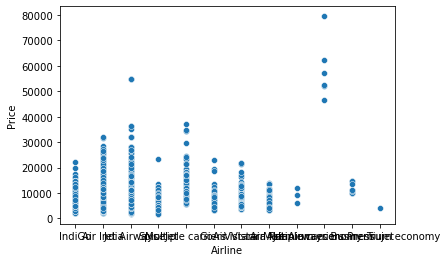

In [160]:
import seaborn as sns
sns.scatterplot(x="Airline",y="Price",data=df_train)

<AxesSubplot:xlabel='Date_of_Journey', ylabel='Price'>

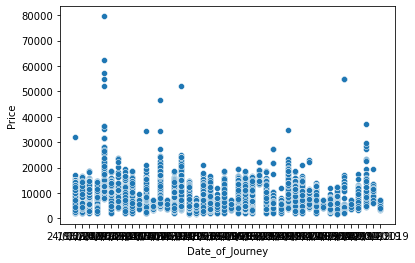

In [161]:
sns.scatterplot(x="Date_of_Journey",y="Price",data=df_train)

<AxesSubplot:xlabel='Source', ylabel='Price'>

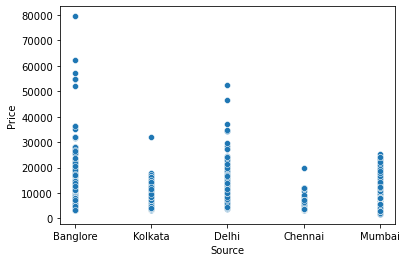

In [162]:
sns.scatterplot(x="Source",y="Price",data=df_train)

<AxesSubplot:xlabel='Destination', ylabel='Price'>

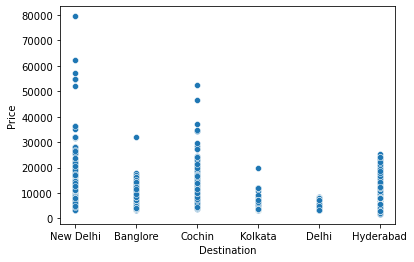

In [163]:
sns.scatterplot(x="Destination",y="Price",data=df_train)

<AxesSubplot:xlabel='Route', ylabel='Price'>

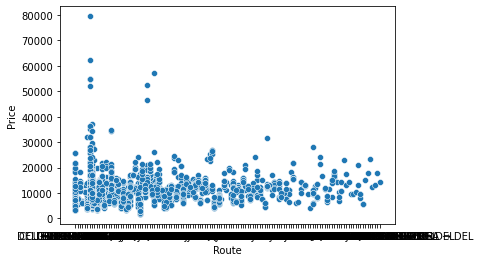

In [164]:
sns.scatterplot(x="Route",y="Price",data=df_train)

<AxesSubplot:xlabel='Dep_Time', ylabel='Price'>

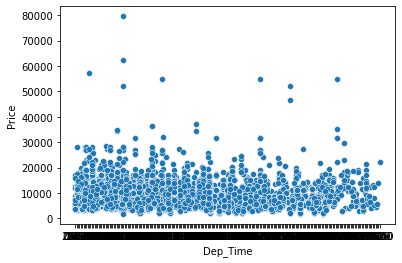

In [165]:
sns.scatterplot(x="Dep_Time",y="Price",data=df_train)

<AxesSubplot:xlabel='Arrival_Time', ylabel='Price'>

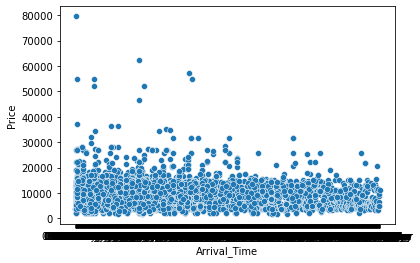

In [166]:
sns.scatterplot(x="Arrival_Time",y="Price",data=df_train)

<AxesSubplot:xlabel='Duration', ylabel='Price'>

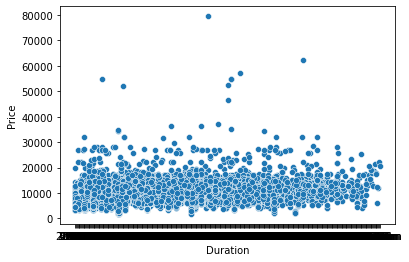

In [167]:
sns.scatterplot(x="Duration",y="Price",data=df_train)

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

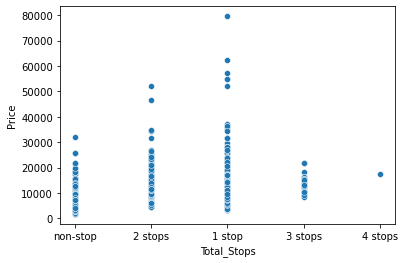

In [168]:
sns.scatterplot(x="Total_Stops",y="Price",data=df_train)

<AxesSubplot:xlabel='Additional_Info', ylabel='Price'>

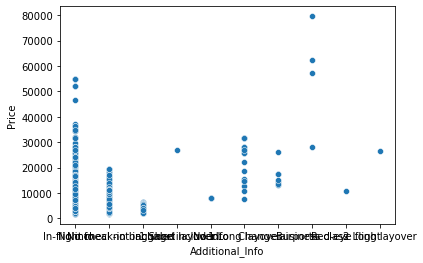

In [169]:
sns.scatterplot(x="Additional_Info",y="Price",data=df_train)

# Let's Check the Data Distribution among all the columns

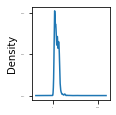

In [170]:
df_train.plot(kind='density', subplots=True, layout=(6,11), sharex=False, legend=False, fontsize=1, figsize=(18,12))
plt.show()

# Correlation

In [171]:
#c_trainhecking the correlation with target columns
df_train.corr()

,Price
Price,1.0


# Data Preprocessing

In [172]:
df_train["Route"].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [173]:
df_train["Additional_Info"].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [174]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other, We can drop Route  columns 

df_train.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [175]:
df_train

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,non-stop,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,12648


.dt.day method will extract only the day of the data.
.dt.month method will only extract month of the data.

In [176]:
df_train['Journey_day']= pd.to_datetime(df_train['Date_of_Journey'], format = "%d/%m/%Y").dt.day

In [177]:
df_train['Journey_Month']= pd.to_datetime(df_train['Date_of_Journey'], format = "%d/%m/%Y").dt.month

In [178]:
df_train

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107,9,4
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145,27,4
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,non-stop,7229,27,4
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,12648,1,3


In [179]:
# Droping Date_of_Journey 
df_train.drop('Date_of_Journey',axis= 1, inplace= True)

In [180]:
# Extracting Hours
df_train["Dep_hour"] = pd.to_datetime(df_train["Dep_Time"]).dt.hour

# Extracting Minutes
df_train["Dep_min"] = pd.to_datetime(df_train["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
df_train.drop(["Dep_Time"], axis = 1, inplace = True)

In [181]:
df_train

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_Month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,non-stop,3897,24,3,22,20
1,Air India,Kolkata,Banglore,13:15,7h 25m,2 stops,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2 stops,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1 stop,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1 stop,13302,1,3,16,50
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,22:25,2h 30m,non-stop,4107,9,4,19,55
10679,Air India,Kolkata,Banglore,23:20,2h 35m,non-stop,4145,27,4,20,45
10680,Jet Airways,Banglore,Delhi,11:20,3h,non-stop,7229,27,4,8,20
10681,Vistara,Banglore,New Delhi,14:10,2h 40m,non-stop,12648,1,3,11,30


In [182]:
# Extracting Hours
df_train["Arrival_hour"] = pd.to_datetime(df_train.Arrival_Time).dt.hour

# Extracting Minutes
df_train["Arrival_min"] = pd.to_datetime(df_train.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
df_train.drop(["Arrival_Time"], axis = 1, inplace = True)


In [183]:
df_train

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,non-stop,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,2h 35m,non-stop,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,3h,non-stop,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,2h 40m,non-stop,12648,1,3,11,30,14,10


In [184]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time
# Assigning and converting Duration column into list
duration = list(df_train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [185]:
# Adding duration_hours and duration_mins list to Train dataframe
df_train["Duration_hours"] = duration_hours
df_train["Duration_mins"] = duration_mins

In [186]:
df_train.drop(["Duration"], axis = 1, inplace = True)

In [187]:
df_train

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,non-stop,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,non-stop,12648,1,3,11,30,14,10,2,40


In [188]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10682 non-null  object
 1   Source          10682 non-null  object
 2   Destination     10682 non-null  object
 3   Total_Stops     10682 non-null  object
 4   Price           10682 non-null  int64 
 5   Journey_day     10682 non-null  int64 
 6   Journey_Month   10682 non-null  int64 
 7   Dep_hour        10682 non-null  int64 
 8   Dep_min         10682 non-null  int64 
 9   Arrival_hour    10682 non-null  int64 
 10  Arrival_min     10682 non-null  int64 
 11  Duration_hours  10682 non-null  int64 
 12  Duration_mins   10682 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [189]:
df_train["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [190]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = df_train[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,0
10679,1,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,1,0,0,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,1,0


In [191]:
df_train["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [192]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = df_train[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


In [193]:
df_train["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [194]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = df_train[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [195]:
df_train["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [196]:
#As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

df_train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [197]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

df_train_data = pd.concat([df_train, Airline, Source, Destination], axis = 1)

In [198]:
df_train_data

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [199]:
df_train_data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [200]:
df_train_data.shape

(10682, 30)

# Test data
Here we will perform same steps for preprocessing which we used for Train data.

In [201]:
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [202]:
df_test.shape

(2671, 10)

In [203]:
# Date_of_Journey
df_test["Journey_day"] = pd.to_datetime(df_test.Date_of_Journey, format="%d/%m/%Y").dt.day
df_test["Journey_month"] = pd.to_datetime(df_test["Date_of_Journey"], format = "%d/%m/%Y").dt.month
df_test.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [204]:
# Dep_Time
df_test["Dep_hour"] = pd.to_datetime(df_test["Dep_Time"]).dt.hour
df_test["Dep_min"] = pd.to_datetime(df_test["Dep_Time"]).dt.minute
df_test.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
df_test["Arrival_hour"] = pd.to_datetime(df_test.Arrival_Time).dt.hour
df_test["Arrival_min"] = pd.to_datetime(df_test.Arrival_Time).dt.minute
df_test.drop(["Arrival_Time"], axis = 1, inplace = True)

In [205]:
# Duration
duration = list(df_test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [206]:
# Adding Duration column to test set
df_test["Duration_hours"] = duration_hours
df_test["Duration_mins"] = duration_mins
df_test.drop(["Duration"], axis = 1, inplace = True)

In [207]:
# Categorical data
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = df_test[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2666,1,0,0,0,0,0,0,0,0,0
2667,0,0,1,0,0,0,0,0,0,0
2668,0,0,0,1,0,0,0,0,0,0
2669,1,0,0,0,0,0,0,0,0,0


In [208]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = df_test[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0
...,...,...,...,...
2666,0,0,1,0
2667,0,0,1,0
2668,0,1,0,0
2669,0,1,0,0


In [209]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = df_test[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
2666,0,0,0,0,0
2667,0,0,0,0,0
2668,1,0,0,0,0
2669,1,0,0,0,0


In [210]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
df_test.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [211]:
# Replacing Total_Stops
df_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [212]:
# Concatenate dataframe --> test_data + Airline + Source + Destination
df_test_data = pd.concat([df_test, Airline, Source, Destination], axis = 1)

In [213]:
df_test_data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [214]:
pd.set_option('display.max_columns', 500)

In [215]:
df_train_data.drop(["Airline_Trujet"],axis = 1, inplace = True)

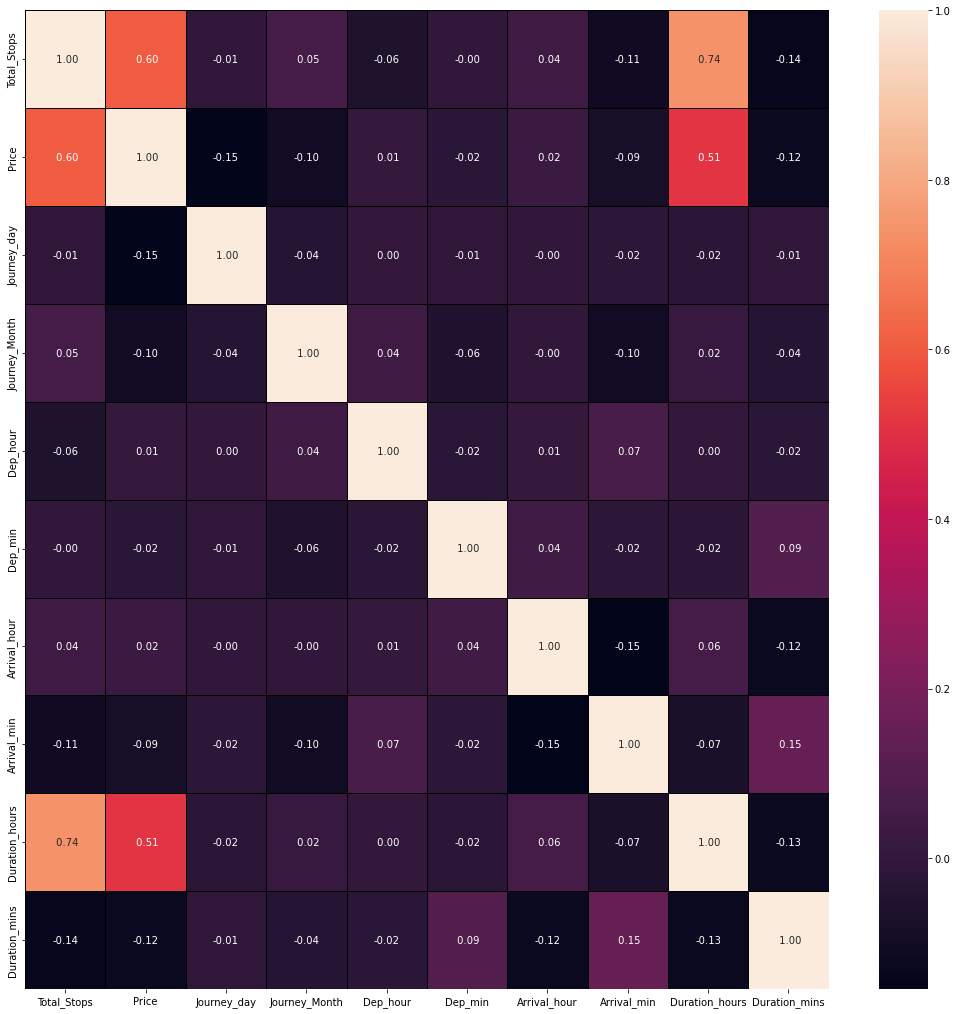

In [216]:
# Finding correlation between Independent and dependent attributes
plt.figure(figsize = (18,18))
sns.heatmap(df_train.corr(), annot = True, linewidths=1,linecolor='black',fmt=' .2f' )
plt.show()

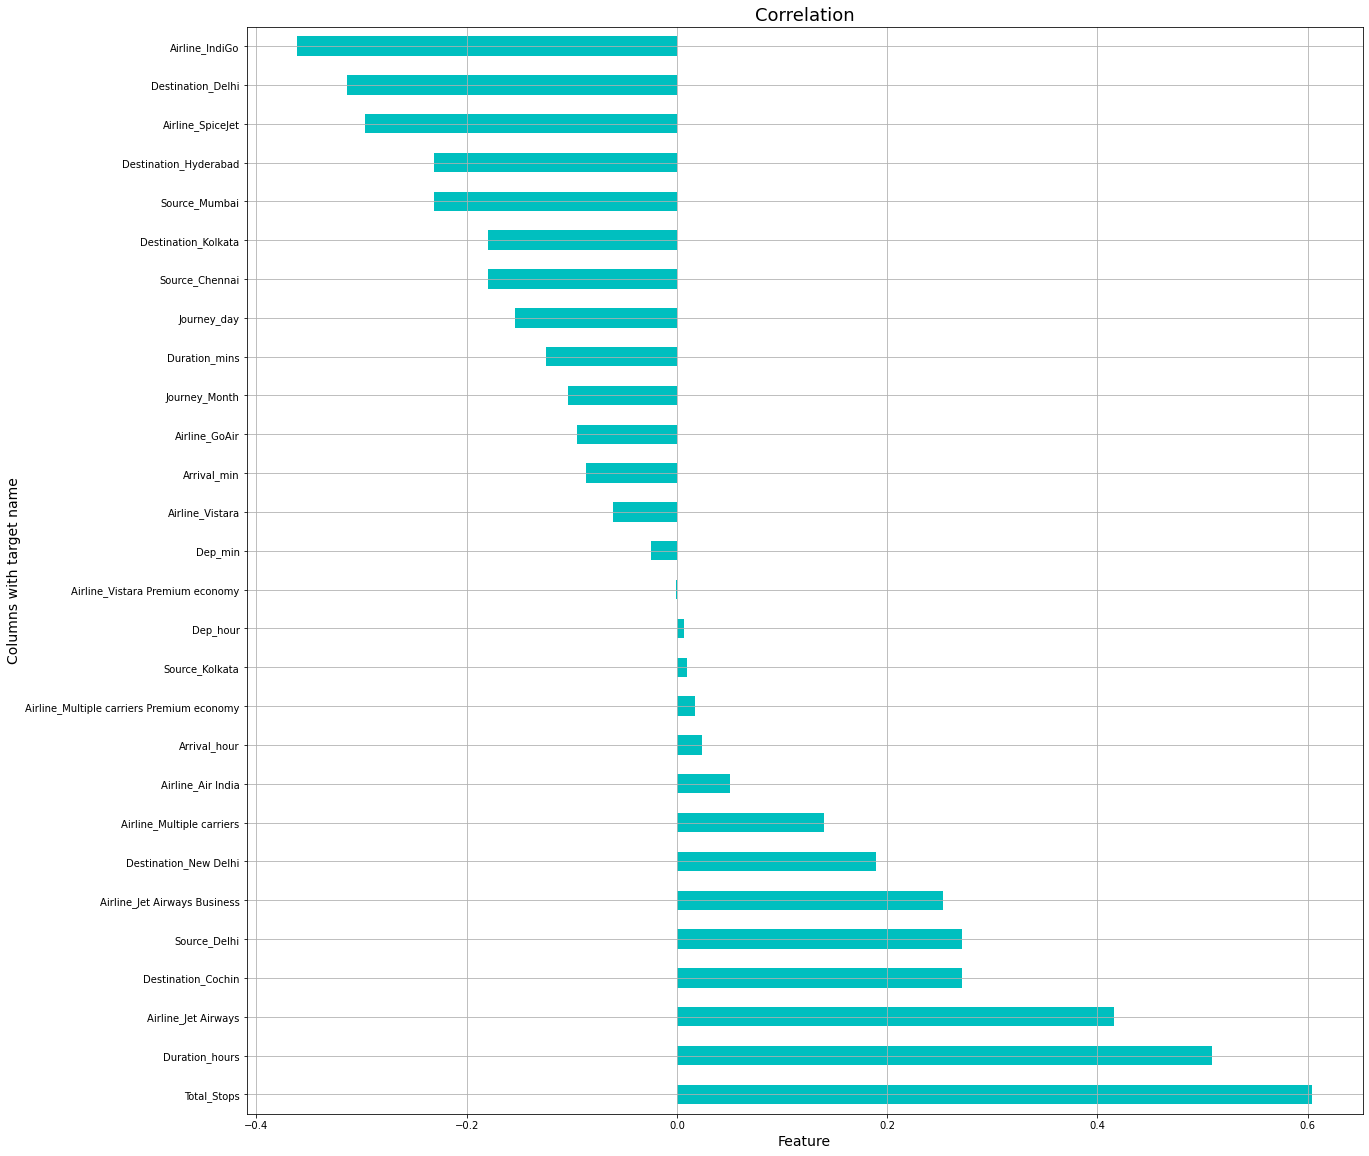

In [217]:
plt.figure(figsize=(20,20))
df_train_data.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='barh',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('Columns with target name', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.grid(True)
plt.show()

In [218]:
df_train_data

,Total_Stops,Price,Journey_day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


# Here Our Features are categorical so no need to check for Outliers and Skewness.

# Scaling the data Using StandardScaler

In [219]:
Scale= df_train_data.iloc[:,2:10]

In [220]:
from sklearn.preprocessing import StandardScaler
SDC=StandardScaler()
Scaled=SDC.fit_transform(Scale)

In [221]:
Scaled_data= pd.DataFrame(data= Scaled, columns=['Journey_day', 'Journey_Month', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_hours', 'Duration_mins'])

In [222]:
Scaled_data

,Journey_day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,1.237288,-1.467402,1.654154,-0.234950,-1.800436,-0.890014,-0.970614,1.279041
1,-1.475307,0.250289,-1.303113,1.363607,-0.050909,-0.587094,-0.381999,-0.196319
2,-0.531796,1.109135,-0.607286,0.031476,-1.363054,0.018745,1.030677,-1.671678
3,-0.177979,0.250289,0.958326,-1.034229,1.407030,0.321664,-0.617445,-0.196319
4,-1.475307,-1.467402,0.610412,1.363607,1.115442,0.624584,-0.735168,0.983969
...,...,...,...,...,...,...,...,...
10677,-0.531796,-0.608557,1.132283,1.630034,1.261236,0.018745,-0.970614,0.098753
10678,1.591104,-0.608557,1.306240,1.097181,1.407030,-0.284175,-0.970614,0.393825
10679,1.591104,-0.608557,-0.781243,-0.234950,-0.342497,-0.284175,-0.852891,-1.671678
10680,-1.475307,-1.467402,-0.259372,0.297903,0.094885,-0.890014,-0.970614,0.688897


In [223]:
df_train_data.drop(['Journey_day', 'Journey_Month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours','Duration_mins'], axis= 1 , inplace= True )

In [224]:
df_train_data

,Total_Stops,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,0,4145,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,0,7229,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,0,12648,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [225]:
df_train_new = pd.concat([Scaled_data, df_train_data ], axis = 1)

In [226]:
df_train_new.shape

(10683, 29)

In [227]:
Scale1= df_test_data.iloc[:,1:9]

In [228]:
from sklearn.preprocessing import StandardScaler
SDC=StandardScaler()
Scaled=SDC.fit_transform(Scale1)

In [229]:
Scaled_data1= pd.DataFrame(data= Scaled, columns=['Journey_day', 'Journey_Month', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_hours', 'Duration_mins'])

In [230]:
df_test_data.drop(['Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_hours', 'Duration_mins'], axis=1, inplace= True )

In [231]:
df_test_new = pd.concat([Scaled_data1, df_test_data ], axis = 1)

In [232]:
df_train_new.dropna(inplace= True)

In [233]:
#Dividing into Fetaures and Target. 
x=df_train_new.drop(['Price'],axis=1)
y=df_train_new['Price']

In [234]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Model Design

In [235]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# 1.LinearRegression

In [236]:
lr=LinearRegression()
for i in range(0, 1000):
    x_train, x_test, y_train, y_test= train_test_split(x,y,random_state= i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train= lr.predict(x_train)
    pred_test= lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)== round(r2_score(y_test,pred_test)*100,1):
        print("At Random state ", i, "The Model performing Well")
        print("At Random State", i)
        print("Training Accuracy score is-",r2_score(y_train,pred_train)*100 )
        print("Testing Accuracy Score is-", r2_score(y_test,pred_test)*100)

At Random state  6 The Model performing Well
At Random State 6
Training Accuracy score is- 61.609386082706166
Testing Accuracy Score is- 61.60848579519818
At Random state  163 The Model performing Well
At Random State 163
Training Accuracy score is- 61.61346702504091
Testing Accuracy Score is- 61.626204871820114
At Random state  170 The Model performing Well
At Random State 170
Training Accuracy score is- 61.57455479263641
Testing Accuracy Score is- 61.56289597038599
At Random state  328 The Model performing Well
At Random State 328
Training Accuracy score is- 61.6231574631941
Testing Accuracy Score is- 61.59644777869184
At Random state  405 The Model performing Well
At Random State 405
Training Accuracy score is- 61.57825241693684
Testing Accuracy Score is- 61.552481498729406
At Random state  408 The Model performing Well
At Random State 408
Training Accuracy score is- 61.52993079024769
Testing Accuracy Score is- 61.508549076721074
At Random state  493 The Model performing Well
At Ran

In [237]:
x.shape

(10681, 28)

In [238]:
y.shape

(10681,)

In [239]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(x,y,random_state=635,test_size=0.20)

In [240]:
lr.fit(x_train_b, y_train_b)
lr_pred=lr.predict(x_test_b)
print(r2_score(y_test_b,lr_pred))

0.6162052138460071


# Cross Validation of Model

In [241]:
test_accuracy= r2_score(y_test_b,lr_pred)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=i, scoring='r2')
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 60.92487869520238 and Accuracy score is 61.620521384600714
At cross fold 3 the Cross Val score is 61.05380611645433 and Accuracy score is 61.620521384600714
At cross fold 4 the Cross Val score is 61.24818140399656 and Accuracy score is 61.620521384600714
At cross fold 5 the Cross Val score is 61.13285271147186 and Accuracy score is 61.620521384600714
At cross fold 6 the Cross Val score is 61.19682018871582 and Accuracy score is 61.620521384600714
At cross fold 7 the Cross Val score is 61.093518028290475 and Accuracy score is 61.620521384600714
At cross fold 8 the Cross Val score is 61.175548360460105 and Accuracy score is 61.620521384600714
At cross fold 9 the Cross Val score is 61.15411563142066 and Accuracy score is 61.620521384600714


In [242]:
print('Error:')
print('Mean Absolute Error:',mean_absolute_error(y_test_b,lr_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,lr_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,lr_pred)))

Error:
Mean Absolute Error: 2011.6021501796001
Mean Squared Error: 8267749.099490021
Root Mean Square Error: 2875.3693848773623


# 2. Lasso

In [243]:

ls=Lasso()
ls.fit(x_train_b, y_train_b)
ls.score(x_train_b, y_train_b)
ls_pred=ls.predict(x_test_b)

lsd=r2_score(y_test_b, ls_pred)
print('R2 score:', lsd*100)

rdscore= cross_val_score(ls,x,y,cv=4,scoring='r2')
lsc=rdscore.mean()
print('Cross val Score :', lsc*100) 

R2 score: 61.608602245588095
Cross val Score : 61.227626852761894


In [244]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,ls_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,ls_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,ls_pred)))

Error:
Mean Absolute Error: 2012.2256802729905
Mean Squared Error: 8270316.733402556
Root Mean Square Error: 2875.8158378801927


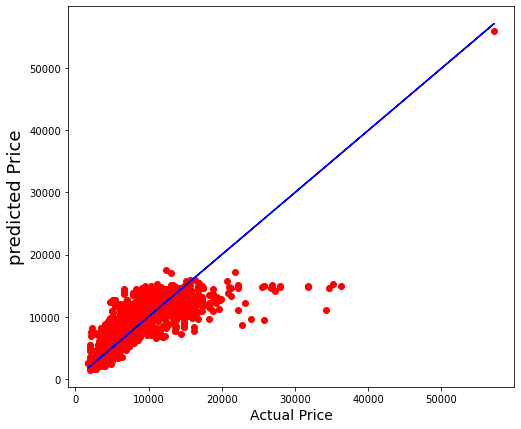

In [245]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= ls_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Price', fontsize= 14 )
plt.ylabel('predicted Price', fontsize= 18)
plt.show()

# 3. Ridge

In [246]:
rd= Ridge()
rd.fit(x_train_b, y_train_b)
rd.score(x_train_b, y_train_b)
rd_pred= rd.predict(x_test_b)

rds=r2_score(y_test_b, rd_pred)
print('r2 score: ', rds*100)

rdcvscore= cross_val_score(rd,x,y,cv=4, scoring='r2')
rdcv=rdcvscore.mean()
print('Cross val Score', rdcv*100)

r2 score:  61.50084653671017
Cross val Score 61.088138045970005


In [247]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,rd_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rd_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rd_pred)))

Error:
Mean Absolute Error: 2016.7276332516017
Mean Squared Error: 8293529.585613708
Root Mean Square Error: 2879.848882426595


# 3. Decision TreeRegressor

In [248]:
dt=DecisionTreeRegressor()
dt.fit(x_train_b, y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score=r2_score(y_test_b, dt_pred)
print('R2 Score:', dt_score*100)

dtcvscore=cross_val_score(dt,x,y,cv=4,scoring='r2')
dtcv=dtcvscore.mean()
print('Cross Val Score:', dtcv*100)

R2 Score: 65.73254727653833
Cross Val Score: 45.35018723667484


In [249]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,dt_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,dt_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,dt_pred)))

Error:
Mean Absolute Error: 1553.936881921697
Mean Squared Error: 7381932.001612463
Root Mean Square Error: 2716.971107982649


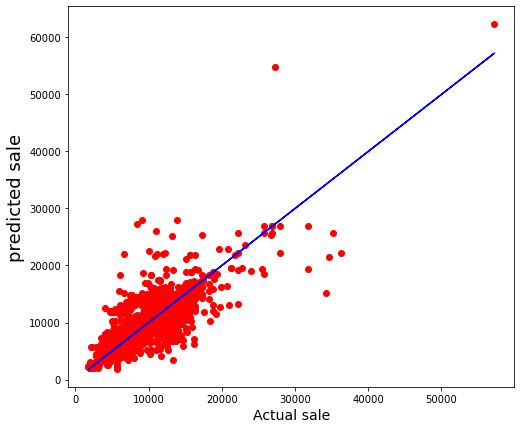

In [250]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= dt_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual sale', fontsize= 14 )
plt.ylabel('predicted sale', fontsize= 18)
plt.show()

# 4. KNeighborsRegressor

In [251]:
kn=KNeighborsRegressor()
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= r2_score(y_test_b, kn_pred)
print('R2 Score: 0', kn_score*100)

kn_cvscore=cross_val_score(kn,x,y, cv=4, scoring='r2')
cv_mean=kn_cvscore.mean()
print('Cross val Score :',cv_mean*100 )

R2 Score: 0 68.55775018186887
Cross val Score : 59.62182100269299


In [252]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,kn_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,kn_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,kn_pred)))

Error:
Mean Absolute Error: 1654.4369677117454
Mean Squared Error: 6773323.713561067
Root Mean Square Error: 2602.5609913239437


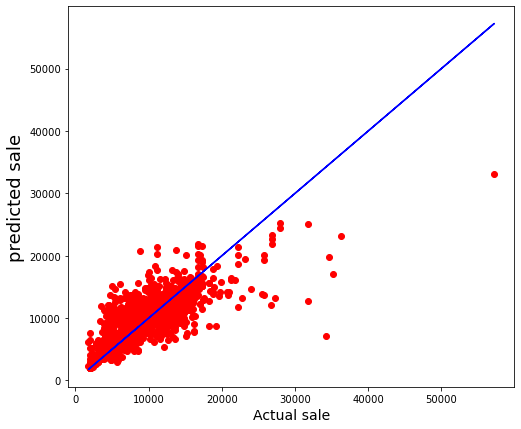

In [253]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= kn_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual sale', fontsize= 14 )
plt.ylabel('predicted sale', fontsize= 18)
plt.show()

# 5. Ensemble Techniques

In [254]:
rf=RandomForestRegressor(criterion='mse', max_features='auto', min_samples_split=2, n_estimators=100)
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= r2_score(y_test_b, rf_pred)
print('R2 score:', rf_score*100)

rfcv=cross_val_score(rf,x,y, cv=4, scoring='r2')
rfcvscore=rfcv.mean()
print('Cross val Score :',rfcvscore*100 )

R2 score: 78.39152975225359
Cross val Score : 64.81193351000694


In [255]:
print('Error:')
print('Mean Absolute Error:',mean_absolute_error(y_test_b,rf_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rf_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rf_pred)))

Error:
Mean Absolute Error: 1328.6584569233735
Mean Squared Error: 4654920.204165564
Root Mean Square Error: 2157.5264086832317


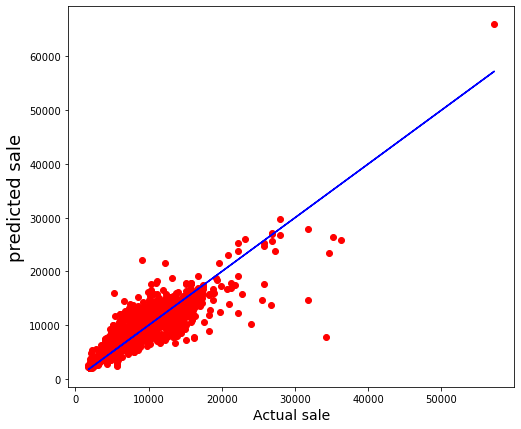

In [256]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= rf_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual sale', fontsize= 14 )
plt.ylabel('predicted sale', fontsize= 18)
plt.show()

# 7. GradientBoostingRegressor

In [257]:
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b,y_train_b)
gb_pred=rf.predict(x_test_b)

gb_score= r2_score(y_test_b, gb_pred)
print('R2 score:', gb_score*100)

gbcv=cross_val_score(gb,x,y, cv=4, scoring='r2')
gbcvscore=gbcv.mean()
print('Cross val Score :',gbcvscore*100 )

R2 score: 78.39152975225359
Cross val Score : 65.03920894786242


In [258]:

print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,gb_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,gb_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,gb_pred)))

Error:
Mean Absolute Error: 1328.6584569233735
Mean Squared Error: 4654920.204165564
Root Mean Square Error: 2157.5264086832317


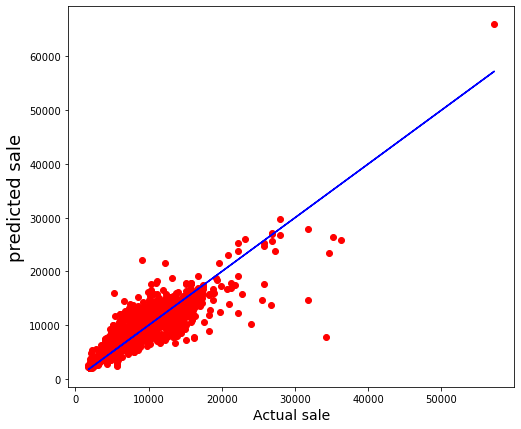

In [259]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= gb_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual sale', fontsize= 14 )
plt.ylabel('predicted sale', fontsize= 18)
plt.show()

# Hyper Parameter Tuning

In [260]:
# Hyper Parameter tuning on  Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters= {'alpha':[0.0001,0.001,0.01,0.1,1,10], 'random_state': list(range(0,10)), 'selection':['cyclic', 'random'], 'max_iter':[500,1000,1200,1500,2000]}
ls=Lasso()
clf=GridSearchCV(ls, parameters)
clf.fit(x_train_b, y_train_b)
print(clf.best_params_)

{'alpha': 1, 'max_iter': 500, 'random_state': 7, 'selection': 'random'}


In [261]:
ls=Lasso(alpha=1,max_iter=500, random_state=7, selection='random')
ls.fit(x_train_b, y_train_b)
ls.score(x_train_b, y_train_b)
ls_pred=ls.predict(x_test_b)

lsd=r2_score(y_test_b, ls_pred)
print('R2 score:', lsd*100)

rdscore= cross_val_score(ls,x,y,cv=4, scoring='r2')
lsc=rdscore.mean()
print('Cross val Score :', lsc*100)

R2 score: 61.608276426452214
Cross val Score : 61.22759793698005


In [268]:
# Random Forest
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['mse', 'mae'],'max_features':['auto', 'sqrt', 'log2'],'n_estimators':[10,20,30,70, 100]}
rf=RandomForestRegressor()
rfclf=GridSearchCV(rf, param_grid=parameters, n_jobs=-1)
rfclf.fit(x_train_b, y_train_b)
print(rfclf.best_params_)

{'criterion': 'mse', 'max_features': 'auto', 'n_estimators': 10}


In [269]:
rf=RandomForestRegressor(criterion='mse', max_features='auto', min_samples_split=10, n_estimators=70)
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= r2_score(y_test_b, rf_pred)
print('R2 score:', rf_score*100)

rfcv=cross_val_score(rf,x,y, cv=5, scoring='r2')
rfcvscore=rfcv.mean()
print('Cross val Score :',rfcvscore*100 )

R2 score: 80.07467834661752
Cross val Score : 68.3810940947418


In [270]:
from sklearn.ensemble import GradientBoostingRegressor
parameters={'loss':['lad', 'huber'],'criterion':['friedman_mse', 'mae'], 'learning_rate':[0.001,0.01,0.1], 'n_estimators':[10,20,100]}
gb=GradientBoostingRegressor()
gbclf=GridSearchCV(gb, param_grid=parameters, n_jobs=-1)
gbclf.fit(x_train_b, y_train_b)
print(gbclf.best_params_)

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'huber', 'n_estimators': 100}


In [271]:
gb=GradientBoostingRegressor(criterion='friedman_mse',learning_rate=0.1, loss='huber', n_estimators= 100)
gb.fit(x_train_b, y_train_b)
gb.score(x_train_b,y_train_b)
gb_pred=rf.predict(x_test_b)

gb_score= r2_score(y_test_b, rf_pred)
print('R2 score:', gb_score*100)

gbcv=cross_val_score(gb,x,y, cv=5, scoring='r2')
gbcvscore=gbcv.mean()
print('Cross val Score :',gbcvscore*100 )

R2 score: 80.07467834661752
Cross val Score : 63.861679034706476


In [272]:
import pickle
filename='Flight_Price_Prediction.pkl'
pickle.dump(ls,open(filename,'wb'))

In [273]:
import numpy as np
a=np.array(y_test_b)
predicted= np.array(ls.predict(x_test_b))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

,original,predicted
0,8586.0,11848.012757
1,3100.0,4923.296779
2,3383.0,3373.750743
3,1965.0,3356.053979
4,6582.0,6146.427788
...,...,...
2132,15554.0,11344.171445
2133,10368.0,14241.030673
2134,9187.0,9618.388673
2135,6781.0,12103.864904


In [274]:
loaded_model = pickle.load(open(filename,'rb'))

In [277]:
prediction=loaded_model.predict(df_test_new)

In [278]:
print(prediction)

[11707.94706634  7347.94626248 11007.78539488 ... 12758.0536769
  9807.05882163 10069.41549809]


In [279]:
predicted= pd.DataFrame(data=prediction)

predicted.to_csv('prediction.csv',index=False)